
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 

#### It is a classification type of Supervised learning.Classifying whether the student needs an early intervention or not

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read student data
sdata=pd.read_csv(r'C:\Users\sreer\Downloads\student-data.csv')
sdata.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [3]:
# Calculate number of students
#Method1
n_student=sdata['sex'].value_counts().sum()

#method2
n_students=sdata.shape[0]



In [4]:
# Calculate number of features
n_features=len(sdata.columns)-1


In [5]:
# Calculate passing students
#method1
n_pased=sdata['passed']=='yes'

#method2
n_passd=sdata.loc[sdata.passed=='yes']

#method3
passe=sdata.loc[sdata.passed=='yes','passed']
n_pass=print("Passed students",passe.value_counts())
n_passed=len(sdata[sdata['passed']=='yes'])

Passed students yes    265
Name: passed, dtype: int64


In [7]:
# Calculate failing students
# method1
n_faild=sdata.loc[sdata.passed=='no'].value_counts().sum()
print("Failed students",n_faild)
#method2
fail=sdata.loc[sdata.passed=='no','passed']
#method3
n_fail=print("Total no of students failed",fail.value_counts().sum())
#method4
n_failed=len(sdata[sdata['passed']=='no'])

Failed students 130
Total no of students failed 130


In [8]:
# Calculate graduation rate

grad_rate=(n_passed/n_students)*100



In [9]:
# Print the results
print("Total no of students is :",n_students)
print("Total no of features is",n_features)
print("Total no of students who passed",n_passed)
print("Total no of students failed",n_failed)
print("Graduation% is",round(grad_rate,2),'%')

Total no of students is : 395
Total no of features is 30
Total no of students who passed 265
Total no of students failed 130
Graduation% is 67.09 %


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [ ]:
# Extract feature columns

In [10]:
fc=list(sdata.columns[:-1])
fc

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [ ]:
# Extract target column 'passed'

In [11]:
tc=sdata.columns[-1]
tc

'passed'

In [ ]:
# Separate the data into feature data and target data (X and y, respectively)

In [12]:
X=sdata[fc]
y=sdata[tc]


In [13]:
X.head()
y.head()
X.shape
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

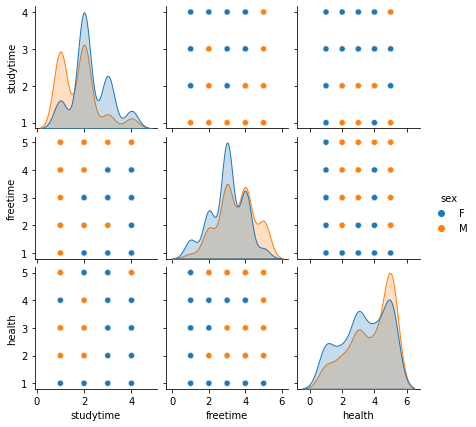

In [14]:
sns.pairplot(data=sdata[['sex','studytime','paid','freetime','health','passed']],hue='sex',height=2) 
plt.show()

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [15]:
sdata.describe(include=['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,passed
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no,yes
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263,265


In [16]:
for i in ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:
    sdata[i]=sdata[i].replace(['yes','no'],[1,0])
sdata.describe(include=['object'])   
sdata.values

array([['GP', 'F', 18, ..., 3, 6, 'no'],
       ['GP', 'F', 17, ..., 3, 4, 'no'],
       ['GP', 'F', 15, ..., 3, 10, 'yes'],
       ...,
       ['MS', 'M', 21, ..., 3, 3, 'no'],
       ['MS', 'M', 18, ..., 5, 0, 'yes'],
       ['MS', 'M', 19, ..., 5, 5, 'no']], dtype=object)

In [17]:
cat_values=[]
values=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian']
for x in values:
    cat_values.append(pd.get_dummies(sdata[x]))
#print(cat_values)    
dummy=pd.concat(cat_values,axis=1)
sdata_new=pd.concat((dummy,sdata),axis=1)
#sdata_new.head()
sdata_new.drop(['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian'],axis=1,inplace=True)
sdata_new.head()
y_new=sdata_new['passed']
X_new=sdata_new.drop(['passed'],axis=1)


In [ ]:
#method2
'''
le=[]
l=X.select_dtypes(include=['object'])
for col in l.columns:
    if (l[col].dtype=='O' and len(l[col].unique())==2):
        le.append(col)
print('Columns that needs a Label Encoding:\n',le)

#label encoding
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in le:
    X[i]=label_encoder.fit_transform(X[i])
X.head(5)

'''

### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [55]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=95,random_state=2)

In [56]:
X_train.head()

,GP,MS,F,M,R,U,GT3,LE3,A,T,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
171,1,0,0,1,0,1,1,0,0,1,...,1,1,1,4,3,2,1,1,3,2
12,1,0,0,1,0,1,0,1,0,1,...,1,1,0,4,3,3,1,3,5,2
13,1,0,0,1,0,1,1,0,0,1,...,1,1,0,5,4,3,1,2,3,2
151,1,0,0,1,0,1,0,1,0,1,...,1,0,1,4,4,4,3,5,5,6
310,1,0,1,0,0,1,0,1,0,1,...,1,0,1,4,2,4,2,2,3,0


In [57]:
# Show the results of the split
print("Testing points in X_test = ",X_test.shape[0])
print("Training points in X_train = ",X_train.shape[0])
print("Testing points in Y_test = ",y_test.shape[0])
print("Training points in Y_train = ",y_train.shape[0])


Testing points in X_test =  95
Training points in X_train =  300
Testing points in Y_test =  95
Training points in Y_train =  300


### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

#### Model selection and Why?
#### 1.Logistic Regression:-It is very easy to implement and has high speed of execution
#### 2.SVM:-can model non linear decisions boundaries and risk of overfitting is less 
#### 3.Random Forest Classifier:-While considering the accuracy complex algorithms like  Random forest and gradient boosting are the best

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

In [58]:
#explaination
### Logistic Regression
###    * Strength:- 1,Output has a nice probabilistic interpretation
###                 2,Algorithm can be regularized to overfitting
###                 3,It can be esaily updated,easy to implement and execution time is low 
###    * Weakness:-1,Tends to underperform when there are multiple or non-linear decision boundaries 
###                2,Not flexible to capture more complex relationship
### SVM
###    * Strength:- 1,memory efficient
###                 2,Algorithm can be regularized to overfitting
###                
###    * Weakness:-1,Not suitable for large datasets 
###                2,Not flexible to capture more complex relationship
### Random Forest Classification
###    * Strength:- 1,Reduce varience and improve accuracy
###                 2,Robust to outliers and it is stable
###                 3,Less impacted by noise
###                
###    * Weakness:-1,It is complex
###                2,It requires longer training period 


In [59]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix

In [60]:
# fit model-1  on traning data 

In [61]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)


C:\Users\sreer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
# predict on the test data 

In [63]:
y_pred=lr_model.predict(X_test)

In [64]:
# calculate the accuracy score

In [65]:
print("Accuracy score",accuracy_score(y_test,y_pred))

Accuracy score 0.7368421052631579


In [66]:
print("F1score",f1_score(y_test,y_pred,pos_label='yes'))
print("Recall score",recall_score(y_test,y_pred,pos_label='yes'))
print("precision score",precision_score(y_test,y_pred,pos_label='yes'))

F1score 0.8201438848920863
Recall score 0.8769230769230769
precision score 0.7702702702702703


In [67]:
confusion_matrix(y_test,y_pred)

array([[13, 17],
       [ 8, 57]], dtype=int64)

In [68]:
svc_model=SVC(kernel='linear',random_state=2)

In [69]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

In [70]:
svc_model.fit(X_train,y_train)

SVC(kernel='linear', random_state=2)

In [71]:
y_pred=svc_model.predict(X_test)

In [72]:
print("Accuracy score",accuracy_score(y_test,y_pred))

Accuracy score 0.7263157894736842


In [73]:

print("F1score",f1_score(y_test,y_pred,pos_label='yes'))
print("Recall score",recall_score(y_test,y_pred,pos_label='yes'))
print("precision score",precision_score(y_test,y_pred,pos_label='yes'))

F1score 0.8115942028985507
Recall score 0.8615384615384616
precision score 0.7671232876712328


In [74]:
confusion_matrix(y_test,y_pred)

array([[13, 17],
       [ 9, 56]], dtype=int64)

In [75]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

In [42]:
rfc=RandomForestClassifier(random_state=42,n_estimators=200,max_depth=20,criterion='entropy')
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [43]:
print("Accuracy score",accuracy_score(y_test,y_pred))

Accuracy score 0.7157894736842105


In [44]:
print("F1score",f1_score(y_test,y_pred,pos_label='yes'))
print("Recall score",recall_score(y_test,y_pred,pos_label='yes'))
print("precision score",precision_score(y_test,y_pred,pos_label='yes'))

F1score 0.8187919463087249
Recall score 0.9384615384615385
precision score 0.7261904761904762


In [45]:
confusion_matrix(y_test,y_pred)


array([[ 7, 23],
       [ 4, 61]], dtype=int64)

#### Form the three models selected, Logistic regression has the high accuracy score compared to other models.It has got 25 misclassification and it has 13 True positives and 57 true negatives .